# Polimi-Vodafone Challenge

Find the right IoT product for the customers

In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

In [2]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier

In [3]:
# Import the train set and test set
train_data2 = pd.read_csv("trainset.csv", delimiter=",")
test_data2 = pd.read_csv("testset.csv", delimiter=",")

train_data = pd.read_csv("normalized_train_dataset_dis.csv", delimiter=",")
test_data = pd.read_csv("normalized_test_dataset_dis.csv", delimiter=",")

In [4]:
prova = train_data
prova = prova.dropna()

prova = prova.iloc[np.random.permutation(len(prova))]
prova = prova.reset_index(drop=True)

In [5]:
prova.shape

(9567, 35)

Test di correlazione chiquadro

In [6]:
array = np.asarray(prova)

X = array[:,0:prova.shape[1]-1]
X = np.asarray(X)
Y = array[:,prova.shape[1]-1]
Y = np.asarray(Y)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_test = SelectKBest(score_func=chi2, k=34)
fit = chi2_test.fit(X,Y)

In [8]:
# summarize scores
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(X)

[1.1e+04 2.4e+01 3.2e+00 2.6e+01 1.4e+01 8.7e+00 4.8e-01 8.1e+00 9.7e+01
 3.1e+01 2.0e+06 2.2e+00 3.4e+01 3.5e+01 3.9e+01 3.5e+01 6.4e+01 6.5e+01
 1.1e+01 1.3e-01 3.6e+00 2.2e+00 9.4e+00 2.3e-01 5.7e+00 3.0e+00 2.5e+00
 2.0e+00 8.8e-01 4.5e-01 6.9e+00 7.0e+01 2.1e+02 7.5e+01]


In [9]:
train_data.columns[chi2_test.get_support(indices=True)]

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ZipCode', 'ChurnScore',
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'Region', 'Province', 'CustomerAge'],
      dtype='object')

In [10]:
prova.columns

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ZipCode', 'ChurnScore',
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'Region', 'Province', 'CustomerAge', 'Product'],
      dtype='object')

In [11]:
test_data.isnull().sum()

ID                                0
DeviceFlag4G                      0
DataArpu                          0
DataAllowanceContinuous           0
DeviceFlagSmartphone              0
MonthlyVoiceTrafficCount          0
MonthlySMSTrafficCount            0
MonthlyDataTraffic                0
CustomerGender                    0
CustomerExpatriate                0
ZipCode                           0
ChurnScore                        0
AirportConnectionsDuration        0
AirportConnectionsCount           0
StationConnectionsDuration        0
StationConnectionsCount           0
ParkingConnectionsDuration        0
ParkingConnectionsCount           0
File-Transfer                     0
Games                             0
Instant-Messaging-Applications    0
Mail                              0
Music-Streaming                   0
Network-Operation                 0
P2P-Applications                  0
Security                          0
Streaming-Applications            0
Terminals                   

In [12]:
'''

MISSING VALUES FOR COLUMN IN THE TEST SET

DataArpu                           757
DataAllowanceContinuous            388
DataAllowanceOneShot              3052

MonthlyVoiceTrafficCount           110
MonthlySMSTrafficCount             110
CustomerAge                        131
EstimatedDevicePrice              1900
MonthlyDataTraffic                 110

Province                           666
Region                             666
ZipCode                            575
ChurnScore                         303
'''

'\n\nMISSING VALUES FOR COLUMN IN THE TEST SET\n\nDataArpu                           757\nDataAllowanceContinuous            388\nDataAllowanceOneShot              3052\n\nMonthlyVoiceTrafficCount           110\nMonthlySMSTrafficCount             110\nCustomerAge                        131\nEstimatedDevicePrice              1900\nMonthlyDataTraffic                 110\n\nProvince                           666\nRegion                             666\nZipCode                            575\nChurnScore                         303\n'

In [13]:
# def features_labels_split(data):
    
#     features = data[['ID', 'DataAllowanceContinuous', 'MonthlyDataTraffic', 'CustomerGender',
#                      'CustomerExpatriate', 'ZipCode', 'Web-Applications', 'CustomerAge', 'Region', 'Province']]
#     labels = data['Product']
#     return features, labels

In [14]:
def features_labels_split(data):
    
    features = data[train_data.columns[chi2_test.get_support(indices=True)]]
    labels = data['Product']
    return features, labels

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def standardize_features(features):

    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)
    return features

In [16]:
def train_test_validation_split(features, labels, val_samples, test_samples):

    features = np.asarray(features)
    labels =np.asarray(labels)
    
    X_test = features[0:test_samples]
    y_test = labels[0:test_samples]

    X_val = features[test_samples:test_samples + val_samples]
    y_val = labels[test_samples:test_samples + val_samples]

    X_train = features[test_samples + val_samples:]
    y_train = labels[test_samples + val_samples:]

    return X_train, X_test, X_val, y_train, y_test, y_val

Toy example

In [17]:
train_feat, train_label = features_labels_split(prova)
train_feat = standardize_features(train_feat)
train_feat.shape, train_label.shape

((9567, 34), (9567,))

In [18]:
num_val_samples = 0
num_test_samples = 616
X_train, X_test, X_val, y_train, y_test, y_val = train_test_validation_split(train_feat, train_label, num_val_samples, num_test_samples)

In [19]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [20]:
# kFOLD

folds = 10
scores = []


kf = KFold(n_splits=folds, shuffle=True)
print(kf)
for train_index, test_index in kf.split(X_train):
    X_train_kF, X_test_kF = X_train[train_index], X_train[test_index]
    y_train_kF, y_test_kF = y_train[train_index], y_train[test_index]
    model_kF = RandomForestClassifier()
    model_kF.fit(X_train_kF, y_train_kF)
    pred = model_kF.predict(X_test_kF)
    f1 = f1_score(y_test_kF, pred, average='micro')
    scores.append(f1)
    print("F1 score: %.3f" % f1)
print("\nThe final F1 score is %.3f (+/- %.3f)" % (np.mean(scores), np.std(scores)))

KFold(n_splits=10, random_state=None, shuffle=True)
F1 score: 0.533
F1 score: 0.587
F1 score: 0.555
F1 score: 0.562
F1 score: 0.565
F1 score: 0.545
F1 score: 0.532
F1 score: 0.554
F1 score: 0.575
F1 score: 0.572

The final F1 score is 0.558 (+/- 0.017)


SOLO per avre un'idea di come dovrebbe performare su dati non visti

In [21]:
# Test Performance

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# F1
print("F1 score on unseen data: %.3f" % f1_score(y_test, y_pred, average='micro'))

F1 score on unseen data: 0.567


In [22]:
# Build the default models to select the best one  
# The commented classifiers are weak
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
xtc = ExtraTreesClassifier()
nb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
#gpc = GaussianProcessClassifier() #Too fucking slow
perc = Perceptron()
paggr = PassiveAggressiveClassifier()
svc = SVC()
lsvc = LinearSVC()
sgd = SGDClassifier()



# Append all the models into an array
models = []
models.append(('SGD', sgd))
models.append(('SVC', svc))
models.append(('LSVC', lsvc))
models.append(('PAGGR', paggr))
models.append(('PERC', perc))
models.append(('LR', lr))
models.append(('LDA', lda))
models.append(('KNN', knn))
models.append(('DTC', dtc))
models.append(('NB', nb))
models.append(('GBC', gbc))
models.append(('RF', rf))
models.append(('ADA', ada))
models.append(('QDA', qda))
models.append(('BNB', bnb))
models.append(('XTC', xtc))



SGD: 0.482 (0.130)
SVC: 0.562 (0.022)
LSVC: 0.567 (0.017)
PAGGR: 0.433 (0.120)
PERC: 0.416 (0.131)
LR: 0.566 (0.019)
LDA: 0.564 (0.016)
KNN: 0.524 (0.015)
DTC: 0.457 (0.017)
NB: 0.493 (0.022)
GBC: 0.587 (0.024)
RF: 0.559 (0.022)
ADA: 0.577 (0.019)
QDA: 0.500 (0.023)
BNB: 0.469 (0.021)
XTC: 0.552 (0.022)


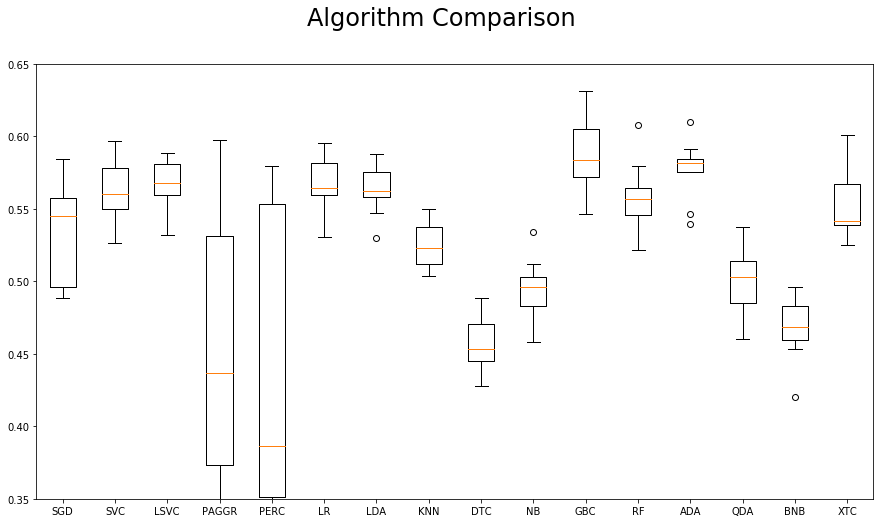

In [23]:
from sklearn.model_selection import cross_val_score


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_micro', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 8))
fig.suptitle(' Comparison', fontsize=24)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
plt.ylim([0.35,0.65])
ax.set_xticklabels(names)
plt.show()

# Parameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression()

penalty = ('l1','l2')
dual = (True, False)
C = np.arange(0.1,1,0.1)

parameters = [{
    'penalty' : penalty,
    'C' : C,
               }]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring='f1_micro',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_f1)
print(best_parameters)

0.5675343537034968
{'C': 0.4, 'penalty': 'l1'}


In [25]:
# Proviamo a potenziare il Gaussian Process Classifier!

# kFOLD

folds = 10
scores = []


kf = KFold(n_splits=folds, shuffle=False)
print(kf)
for train_index, test_index in kf.split(X_train):
    X_train_kF, X_test_kF = X_train[train_index], X_train[test_index]
    y_train_kF, y_test_kF = y_train[train_index], y_train[test_index]
    model_kF = GradientBoostingClassifier()
    model_kF.fit(X_train_kF, y_train_kF)
    pred = model_kF.predict(X_test_kF)
    f1 = f1_score(y_test_kF, pred, average='micro')
    scores.append(f1)
    print("F1 score: %.3f" % f1)
print("\nThe final F1 score is %.3f (+/- %.3f)" % (np.mean(scores), np.std(scores)))

KFold(n_splits=10, random_state=None, shuffle=False)
F1 score: 0.607
F1 score: 0.603
F1 score: 0.631
F1 score: 0.593
F1 score: 0.550
F1 score: 0.574
F1 score: 0.571
F1 score: 0.562
F1 score: 0.577
F1 score: 0.606

The final F1 score is 0.587 (+/- 0.024)


In [26]:
# Test Performance

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# F1
print("F1 score on unseen data: %.3f" % f1_score(y_test, y_pred, average='micro'))

F1 score on unseen data: 0.591


Da questo punto in avanti, riapplichiamo le stesse trasformazioni che abbiamo appricato al train per fare la predizione sul testset

In [27]:
test_data.isnull().sum()

ID                                0
DeviceFlag4G                      0
DataArpu                          0
DataAllowanceContinuous           0
DeviceFlagSmartphone              0
MonthlyVoiceTrafficCount          0
MonthlySMSTrafficCount            0
MonthlyDataTraffic                0
CustomerGender                    0
CustomerExpatriate                0
ZipCode                           0
ChurnScore                        0
AirportConnectionsDuration        0
AirportConnectionsCount           0
StationConnectionsDuration        0
StationConnectionsCount           0
ParkingConnectionsDuration        0
ParkingConnectionsCount           0
File-Transfer                     0
Games                             0
Instant-Messaging-Applications    0
Mail                              0
Music-Streaming                   0
Network-Operation                 0
P2P-Applications                  0
Security                          0
Streaming-Applications            0
Terminals                   

In [28]:
X_pred = test_data[train_data.columns[chi2_test.get_support(indices=True)]]

In [29]:
X_pred.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,MonthlyDataTraffic,CustomerGender,CustomerExpatriate,...,P2P-Applications,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,Region,Province,CustomerAge
0,10909,1.0,0.278966,0.088247,1.0,0.087240,0.002372,0.117077,0.0,0.0,...,1.191584e-03,0.000095,0.094630,0.000000,0.000751,0.010485,0.866945,0.0,71.0,25.0
1,11055,1.0,0.511595,0.054729,1.0,0.143229,0.001873,0.023151,1.0,0.0,...,5.463317e-05,0.007726,0.097810,0.000000,0.002750,0.007511,0.522451,0.0,42.0,55.0
2,1346,0.0,0.108560,0.043853,1.0,0.035807,0.000125,0.021345,1.0,1.0,...,0.000000e+00,0.001035,0.210621,0.000004,0.005871,0.001355,0.280302,0.0,42.0,55.0
3,11102,0.0,0.232629,0.027273,1.0,0.127604,0.001873,0.036968,0.0,0.0,...,1.019815e-04,0.002331,0.217483,0.000000,0.002814,0.000254,0.687266,0.0,24.0,35.0
4,7405,0.0,0.449560,0.115703,1.0,0.219401,0.002871,0.086984,1.0,0.0,...,9.328607e-07,0.000699,0.420700,0.000000,0.005276,0.000626,0.512064,0.0,42.0,35.0


In [30]:
X_pred.columns

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ZipCode', 'ChurnScore',
       'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'Region', 'Province', 'CustomerAge'],
      dtype='object')

In [31]:
classifier = GradientBoostingClassifier()
classifier.fit(train_feat, train_label)
y_pred = classifier.predict(X_pred)

In [32]:
submit = X_pred['ID']
submit = pd.DataFrame({'ID': submit})

pred = y_pred
pred = pd.DataFrame({'Product': y_pred})

product = []
product = pred.Product
product.replace({ 
    int(0) : 'Non-Customer', 
    int(1) : 'V-Bag', 
    int(2) : 'V-Pet', 
    int(3) : 'V-Auto'},
    inplace=True)

submit = submit.join(product)
submit.to_csv('result.csv', index = False, encoding='utf-8')

In [33]:
# F1
print("F1 score on unseen data: %.3f" % f1_score(y_test, y_pred[:616], average='micro'))

F1 score on unseen data: 0.484


In [34]:
submit.Product.describe()

count             3190
unique               4
top       Non-Customer
freq              2636
Name: Product, dtype: object